# SAYLI BODARE 
   Data Science & Business Analysis Intern at Sparks Foundation - #GRIPJULY2021 


# Task 1 : Prediction Using Unsupervised Machine Learning

Predict the percentage of an student based on the no. of study hours.

# Importing libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading data from remote link

In [2]:
url = "http://bit.ly/w-data"
stu_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


# Data Exploration

In [3]:
stu_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
stu_data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
stu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
stu_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
stu_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
stu_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
stu_data.mean()

Hours      5.012
Scores    51.480
dtype: float64

# Plotting the distribution of scores

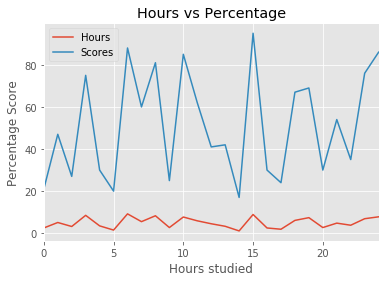

In [10]:
#Visualizing with line plot

plt.style.use('ggplot')
stu_data.plot(kind="line")
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

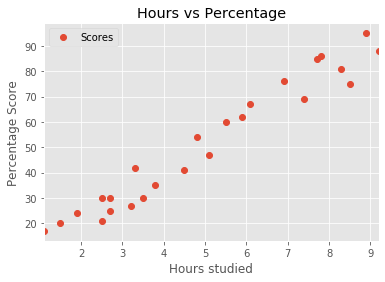

In [11]:
#Visualizing with scatter plot
stu_data.plot(x='Hours', y='Scores' , style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

# Dividing the data into attributes and labels

In [12]:
X = stu_data.iloc[:, :-1].values
y = stu_data.iloc[:, 1].values

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm

In [14]:
from sklearn.linear_model import LinearRegression  
lrmodel = LinearRegression()  
lrmodel.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Plotting the regression line

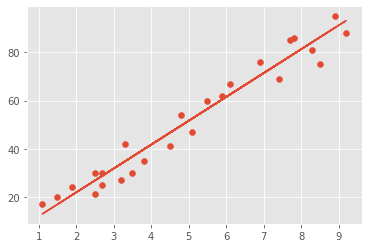

In [15]:

line = lrmodel.coef_*X+lrmodel.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [16]:
y_pred = lrmodel.predict(X_test)

In [17]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicting the score with single input

In [19]:
hours = 9.25
pred = lrmodel.predict([[hours]])

print(f'No. of Hours = {hours}')
print(f'predicted score = {pred[0]}')

No. of Hours = 9.25
predicted score = 93.69173248737538


# Evaluation of the model

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


# Accuracy of the model

In [21]:
print("Accuracy:" ,metrics.r2_score(y_test,y_pred))

Accuracy: 0.9454906892105356
